<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/7506R_TP1_GRUPO24_CHP2_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 1: Reservas de Hotel

## 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

      ➢ Torraca Lautaro - 108813
      ➢ Negrotti Gianluca - 108184
      ➢ Marco Tosi - 107237

In [3087]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# » Lectura del archivo

In [3088]:
url_train = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_train.csv'
url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_test.csv?token=GHSAT0AAAAAACHIC2WUA47V565V4RQSZ4NYZIJBLQA'

ds_original = pd.read_csv(url_train)

ds_base = ds_original.copy()
df_base = pd.DataFrame(ds_base)

# » Muestra del DataSet


In [3089]:
ds_base.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


### » Tipos de las varibales

In [3090]:
ds_base.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

In [3091]:
#reservation_status_date -> esta solo en test
#is_canceled -> esta solo en train

In [3092]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = ds_base.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.25,78.0,0.0,629.0
arrival_date_week_number,27.22,28.0,33.0,53.0
stays_in_weekend_nights,0.92,1.0,0.0,16.0
adults,1.86,2.0,2.0,55.0
children,0.10,0.0,0.0,10.0
babies,0.01,0.0,0.0,9.0
is_repeated_guest,0.03,0.0,0.0,1.0
previous_cancellations,0.11,0.0,0.0,26.0
previous_bookings_not_canceled,0.12,0.0,0.0,70.0
booking_changes,0.20,0.0,0.0,17.0


In [3093]:
nombre_variables_cualitativas = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'reserved_room_type', 'distribution_channel', 'assigned_room_type',
                                 'deposit_type', 'customer_type']

ds_cualitativo = ds_base.loc[:, nombre_variables_cualitativas]

In [3094]:
ds_cualitativo.nunique().sort_values(ascending=True)

hotel                     2
deposit_type              3
customer_type             4
meal                      5
distribution_channel      5
market_segment            8
reserved_room_type       10
arrival_date_month       12
assigned_room_type       12
country                 149
dtype: int64

In [3095]:
round(ds_cualitativo.hotel.value_counts(normalize=True) * 100, 2)

City Hotel      68.05
Resort Hotel    31.95
Name: hotel, dtype: float64

In [3096]:
round(ds_cualitativo.deposit_type.value_counts(normalize=True) * 100, 2)

No Deposit    83.48
Non Refund    16.39
Refundable     0.13
Name: deposit_type, dtype: float64

tiene Undefined

In [3097]:
round(ds_cualitativo.distribution_channel.value_counts(normalize=True) * 100, 2)

TA/TO        83.74
Direct       10.98
Corporate     5.12
GDS           0.14
Undefined     0.01
Name: distribution_channel, dtype: float64

In [3098]:
round(ds_cualitativo.customer_type.value_counts(normalize=True) * 100, 2)

Transient          76.64
Transient-Party    19.65
Contract            3.28
Group               0.42
Name: customer_type, dtype: float64

In [3099]:
round(ds_cualitativo.meal.value_counts(normalize=True) * 100, 2)

BB           77.26
HB           12.04
SC            8.97
Undefined     0.95
FB            0.77
Name: meal, dtype: float64

tiene Undefined

In [3100]:
round(ds_cualitativo.market_segment.value_counts(normalize=True) * 100, 3)

Online TA        47.274
Offline TA/TO    20.002
Groups           18.647
Direct            9.299
Corporate         4.012
Complementary     0.580
Aviation          0.183
Undefined         0.003
Name: market_segment, dtype: float64

In [3101]:
round(ds_cualitativo.arrival_date_month.value_counts(normalize=True) * 100, 2)

August       11.59
July         10.54
May           9.95
April         9.49
October       9.47
June          9.32
September     9.08
March         7.91
February      6.66
December      5.64
November      5.50
January       4.85
Name: arrival_date_month, dtype: float64

In [3102]:
ds_cualitativo.country.value_counts(normalize=True) * 100

PRT    45.305712
GBR     9.292939
FRA     7.795176
ESP     6.824224
DEU     5.368605
         ...    
HND     0.001621
FJI     0.001621
LIE     0.001621
ATA     0.001621
RWA     0.001621
Name: country, Length: 149, dtype: float64

In [3103]:
nombre_variables_ordinales = ['reserved_room_type', 'assigned_room_type']

ds_ordinales = ds_base.loc[:, nombre_variables_ordinales]

In [3104]:
round(ds_ordinales.reserved_room_type.value_counts(normalize=True) * 100, 2)

A    72.90
D    15.48
E     5.25
F     2.34
G     1.76
B     0.94
C     0.78
H     0.54
P     0.01
L     0.00
Name: reserved_room_type, dtype: float64

Tiene L de mas

In [3105]:
round(ds_ordinales.assigned_room_type.value_counts(normalize=True) * 100, 3)

A    64.618
D    19.689
E     6.104
F     2.941
G     2.063
C     1.820
B     1.706
H     0.620
I     0.234
K     0.192
P     0.011
L     0.002
Name: assigned_room_type, dtype: float64

In [3106]:
ds_base.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


valores atipicos

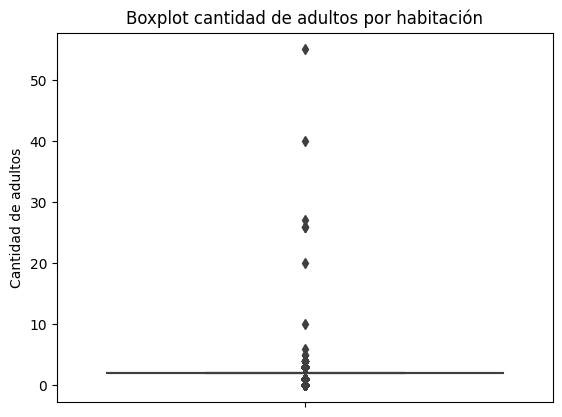

In [3107]:
grf = sns.boxplot(y=ds_base.adults, data= ds_base ).set(title="Boxplot cantidad de adultos por habitación",xlabel="",ylabel="Cantidad de adultos")

In [3108]:
ds_adults = ds_base.loc[:, 'adults']

df_base['adults'].mask(df_base['adults'] >= 8, ds_adults.median(), inplace=True)
df_base['adults'].mask(df_base['adults'] < 1, ds_adults.median(), inplace=True) #posiblemente vamos a eleminar la fila que no contiene adultos en la reserva.

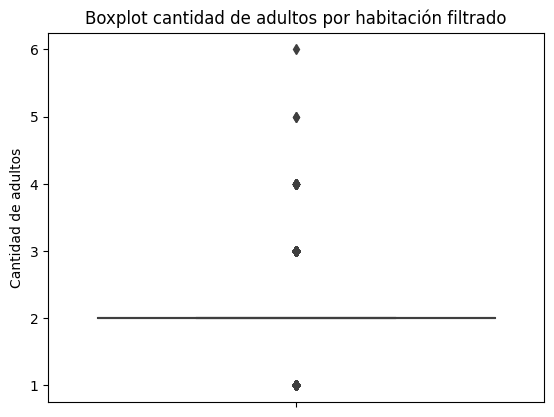

In [3109]:
grf = sns.boxplot(y=ds_adults, data= ds_base ).set(title="Boxplot cantidad de adultos por habitación filtrado",xlabel="",ylabel="Cantidad de adultos")

children


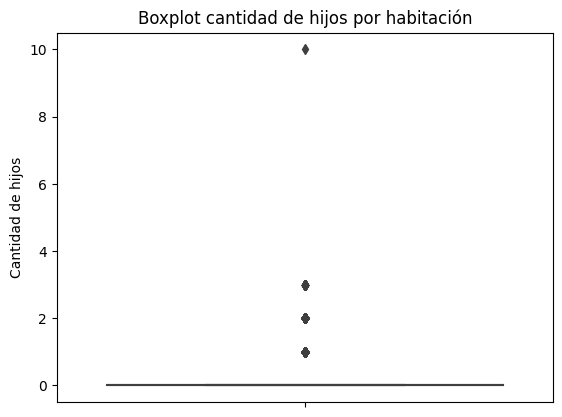

In [3110]:
grf = sns.boxplot(y=ds_base.children, data= ds_base ).set(title="Boxplot cantidad de hijos por habitación",xlabel="",ylabel="Cantidad de hijos")

In [3111]:
ds_children = ds_base.loc[:, 'children']

df_base['children'].mask(df_base['children'] >= 6, ds_children.median(), inplace=True)
df_base['children'].mask(df_base['children'] < 1, ds_children.median(), inplace=True)

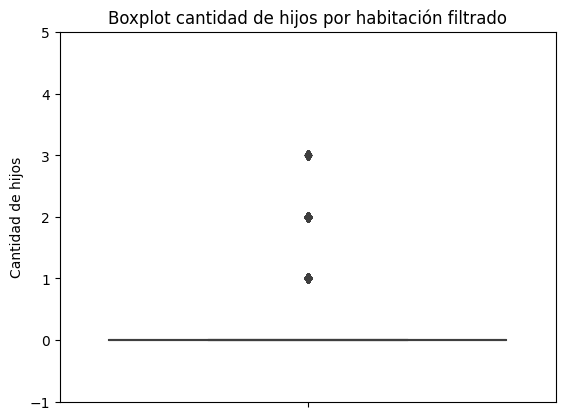

In [3112]:
grf = sns.boxplot(y=ds_children, data= ds_base ).set(title="Boxplot cantidad de hijos por habitación filtrado",xlabel="",ylabel="Cantidad de hijos")
plt.ylim(-1,5)
plt.show()

babies

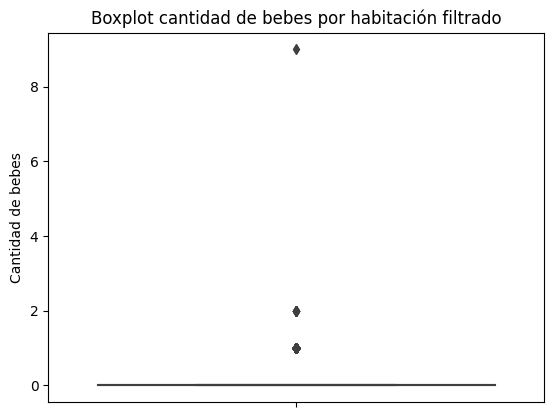

In [3113]:
grf = sns.boxplot(y=ds_base.babies, data= ds_base ).set(title="Boxplot cantidad de bebes por habitación filtrado",xlabel="",ylabel="Cantidad de bebes")

In [3114]:
ds_babies = ds_base.loc[:, 'babies']

df_base['babies'].mask(df_base['babies'] >= 4, ds_babies.median(), inplace=True)
df_base['babies'].mask(df_base['babies'] < 1, ds_babies.median(), inplace=True)

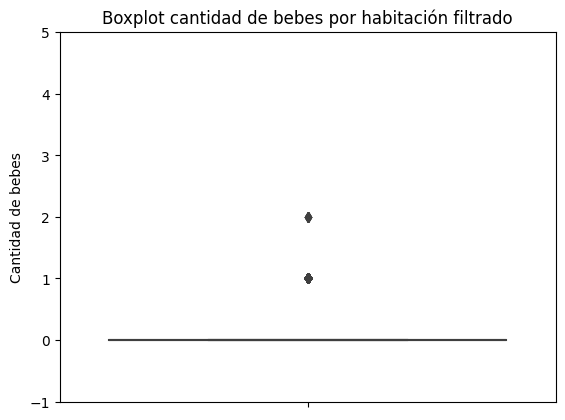

In [3115]:
grf = sns.boxplot(y=ds_babies, data= ds_base ).set(title="Boxplot cantidad de bebes por habitación filtrado",xlabel="",ylabel="Cantidad de bebes")
plt.ylim(-1,5)
plt.show()

car parking

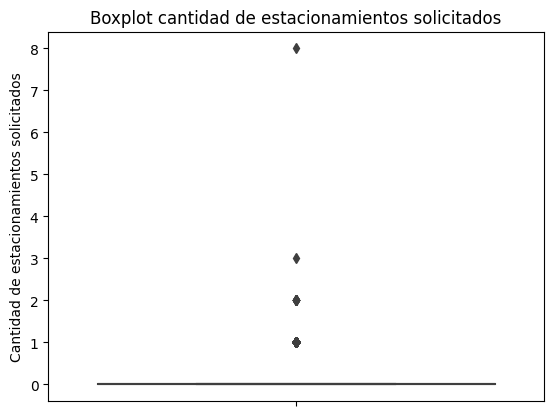

In [3116]:
grf = sns.boxplot(y=ds_base.required_car_parking_spaces, data= ds_base ).set(title="Boxplot cantidad de estacionamientos solicitados",xlabel="",ylabel="Cantidad de estacionamientos solicitados")

In [3117]:
ds_required_car_parking_spaces = ds_base.loc[:, 'required_car_parking_spaces']

df_base['required_car_parking_spaces'].mask(df_base['required_car_parking_spaces'] > 3, ds_required_car_parking_spaces.median(), inplace=True)
df_base['required_car_parking_spaces'].mask(df_base['required_car_parking_spaces'] < 1, ds_required_car_parking_spaces.median(), inplace=True)

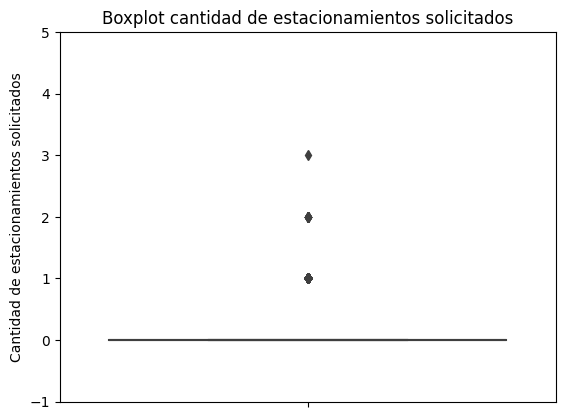

In [3118]:
grf = sns.boxplot(y=ds_required_car_parking_spaces, data= ds_base ).set(title="Boxplot cantidad de estacionamientos solicitados",xlabel="",ylabel="Cantidad de estacionamientos solicitados")
plt.ylim(-1,5)
plt.show()

como quedo filtrado

In [3119]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = ds_base.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.25,78.0,0.0,629.0
arrival_date_week_number,27.22,28.0,33.0,53.0
stays_in_weekend_nights,0.92,1.0,0.0,16.0
adults,1.87,2.0,2.0,6.0
children,0.10,0.0,0.0,3.0
babies,0.01,0.0,0.0,2.0
is_repeated_guest,0.03,0.0,0.0,1.0
previous_cancellations,0.11,0.0,0.0,26.0
previous_bookings_not_canceled,0.12,0.0,0.0,70.0
booking_changes,0.20,0.0,0.0,17.0


elimanos columnas al pedo

In [3120]:

columnas_utiles = ['adults', 'children','babies','is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled','booking_changes',
                  'days_in_waiting_list', 'hotel', 'is_canceled', 'deposit_type', 'customer_type','country', 'reserved_room_type', 'assigned_room_type']

ds_trabajo = ds_base.loc[:, columnas_utiles]

ds_trabajo.columns.tolist()

ds_trabajo.shape

(61913, 15)

In [3121]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

adults                            0.000000
children                          0.006461
babies                            0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
days_in_waiting_list              0.000000
hotel                             0.000000
is_canceled                       0.000000
deposit_type                      0.000000
customer_type                     0.000000
country                           0.356952
reserved_room_type                0.000000
assigned_room_type                0.000000
dtype: float64


In [3122]:
ds_trabajo=ds_trabajo.dropna()
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

ds_trabajo.shape

adults                            0.0
children                          0.0
babies                            0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
booking_changes                   0.0
days_in_waiting_list              0.0
hotel                             0.0
is_canceled                       0.0
deposit_type                      0.0
customer_type                     0.0
country                           0.0
reserved_room_type                0.0
assigned_room_type                0.0
dtype: float64


(61688, 15)

entrenamiento y pedriccion

In [3123]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo['is_canceled'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [3124]:
x_train.head(2)

,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,hotel,deposit_type,customer_type,country,reserved_room_type,assigned_room_type
26108,2,0.0,0,0,0,0,1,0,Resort Hotel,No Deposit,Transient,CN,A,A
61613,2,0.0,0,0,0,0,0,0,Resort Hotel,No Deposit,Transient,ESP,A,A


In [3125]:
y_train.head(2)

26108    0
61613    1
Name: is_canceled, dtype: int64

In [3126]:
x_test.head(2)

,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,hotel,deposit_type,customer_type,country,reserved_room_type,assigned_room_type
47711,2,0.0,0,0,0,0,0,0,City Hotel,Non Refund,Transient,PRT,A,A
29355,1,0.0,0,0,0,0,0,0,City Hotel,No Deposit,Transient,IRL,A,A


In [3127]:
y_test.head(2)

47711    1
29355    0
Name: is_canceled, dtype: int64

In [3128]:
#One hot encoding para variables categoricas
ds_trabajo = pd.get_dummies(ds_trabajo, columns=['hotel', 'country', 'deposit_type', 'customer_type','reserved_room_type', 'assigned_room_type'], drop_first=True)
ds_trabajo.head()

,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,is_canceled,hotel_Resort Hotel,...,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P
0,1,0.0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3129]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo['is_canceled'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y,
                                                    test_size=0.30,  #proporcion 70/30
                                                    random_state=2) #semilla

In [3130]:
#Creamos un clasificador con hiperparámetros
tree_model = tree.DecisionTreeClassifier(criterion="gini",
                                         max_depth = 25,
                                         min_samples_leaf=10)
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

In [3131]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [3132]:
#Valores Reales
y_test.values

array([1, 0, 0, ..., 1, 1, 1])

In [3133]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head(10)

,test,pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1


Text(50.722222222222214, 0.5, 'True')

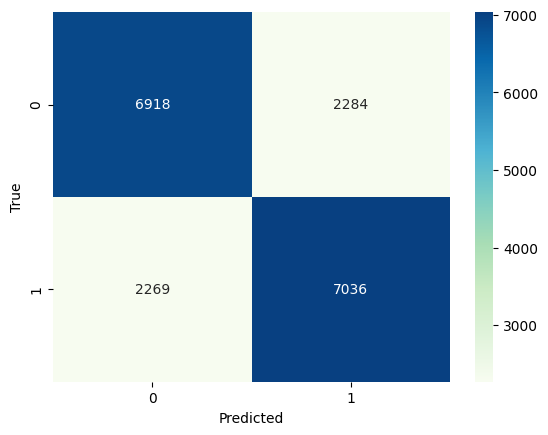

In [3134]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [3135]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7539849786567245
Recall: 0.7561526061257389
Precision: 0.7549356223175966
f1 score: 0.7555436241610738


In [3136]:
ds_resultados.to_csv()

',test,pred\n0,1,1\n1,0,0\n2,0,0\n3,1,1\n4,0,0\n5,0,0\n6,1,1\n7,0,0\n8,0,0\n9,1,1\n10,0,0\n11,1,1\n12,1,1\n13,1,1\n14,0,1\n15,0,0\n16,0,1\n17,1,0\n18,1,1\n19,1,1\n20,1,1\n21,1,0\n22,1,1\n23,1,1\n24,1,1\n25,1,1\n26,1,1\n27,1,1\n28,1,1\n29,1,1\n30,0,0\n31,1,1\n32,1,1\n33,0,0\n34,0,1\n35,1,1\n36,0,0\n37,1,1\n38,1,1\n39,0,0\n40,0,0\n41,1,0\n42,1,1\n43,0,0\n44,1,1\n45,0,0\n46,1,1\n47,1,1\n48,0,1\n49,1,1\n50,1,0\n51,1,1\n52,0,0\n53,1,1\n54,0,0\n55,0,1\n56,0,1\n57,1,1\n58,1,1\n59,1,1\n60,0,0\n61,1,1\n62,1,0\n63,1,1\n64,1,1\n65,1,1\n66,1,1\n67,0,0\n68,0,1\n69,0,0\n70,0,1\n71,1,1\n72,0,1\n73,0,1\n74,0,0\n75,1,1\n76,0,1\n77,1,1\n78,1,1\n79,1,1\n80,0,0\n81,0,0\n82,1,0\n83,1,0\n84,0,1\n85,0,0\n86,0,0\n87,1,1\n88,1,1\n89,1,1\n90,0,0\n91,0,0\n92,0,0\n93,0,0\n94,0,0\n95,0,0\n96,1,1\n97,0,1\n98,1,1\n99,0,0\n100,1,1\n101,0,1\n102,1,1\n103,0,0\n104,0,0\n105,1,1\n106,0,0\n107,1,1\n108,0,0\n109,0,0\n110,0,0\n111,1,1\n112,0,0\n113,1,1\n114,1,1\n115,0,1\n116,1,1\n117,1,1\n118,0,0\n119,0,0\n120,1,1\n121,1,1\